<h1> Clustering

# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Percorso del dataset
file_path = "/content/drive/MyDrive/Progetti data science/Progetto Python/Clustering/songs_spotify.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sb

from scipy.stats import skewnorm
from matplotlib import style
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib import rcParams
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering,KMeans,Birch,MiniBatchKMeans,DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from plotly import tools
from plotly.subplots import make_subplots
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
%matplotlib inline

# ETL

In [ ]:
df = pd.read_csv(file_path, low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [ ]:
df.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

<h3>Conteggio dei valori nulli

In [ ]:
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

<h3> Conteggio dei valori duplicati

In [ ]:
check = df.duplicated()
Counter(check)

Counter({False: 42305})

<h3>Drop delle colonne</h3>

In [ ]:
df = df.drop(columns = ["type", "id", "uri", "track_href", "analysis_url", "song_name","Unnamed: 0", "title"])

<h3>Lista dei valori che assume la colonna del genere</h3>

In [ ]:
df["genre"].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

# Analisi esplorativa dei dati

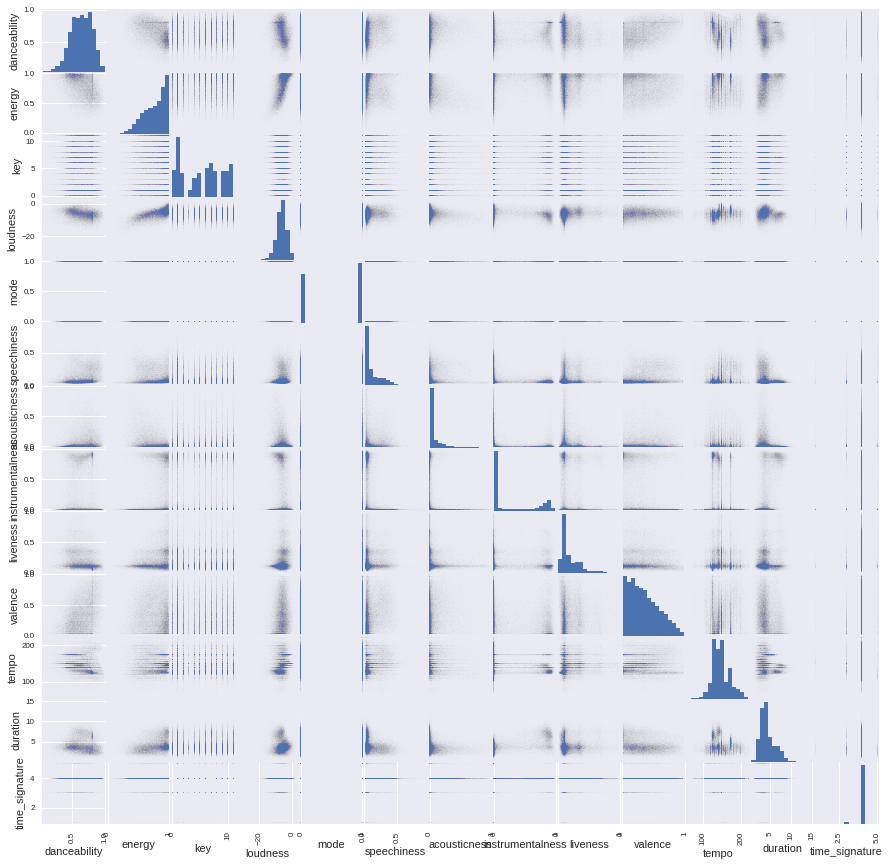

In [ ]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(df, marker = 'o', s=0.01, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

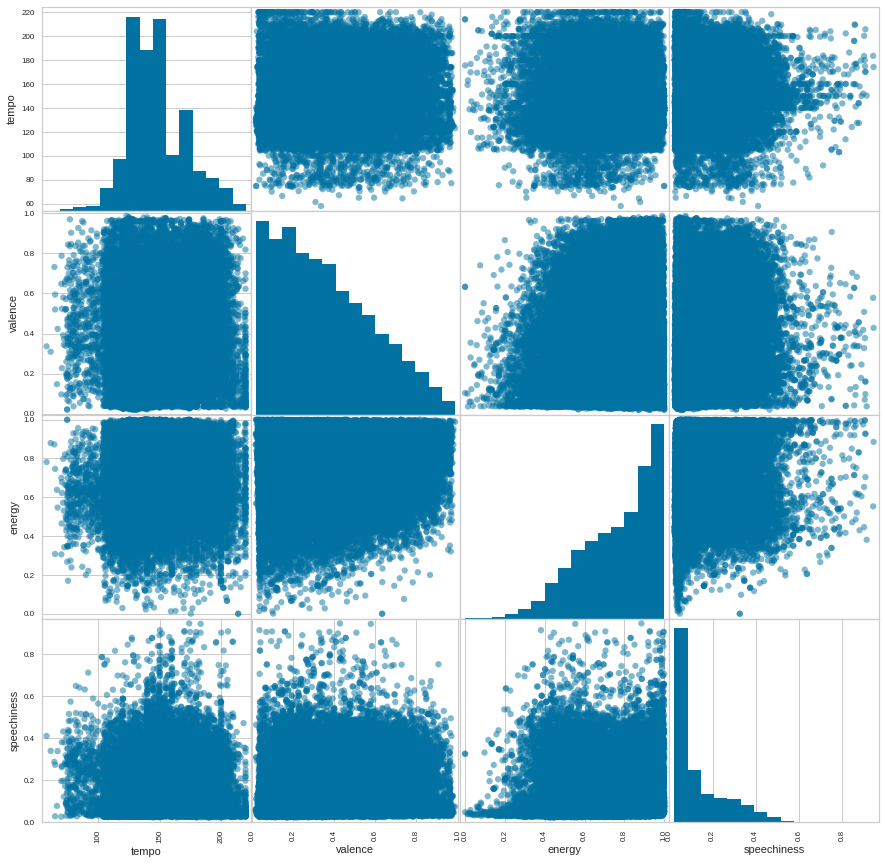

In [ ]:
aud = ['tempo', 'valence', 'energy', 'speechiness']
x_aud = df[aud]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(x_aud, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

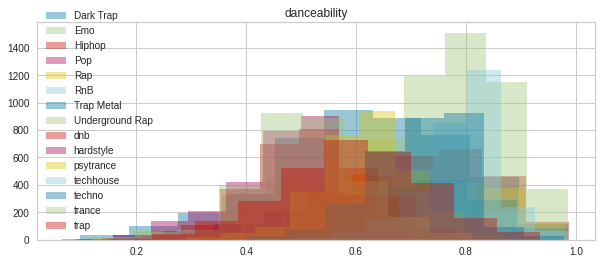

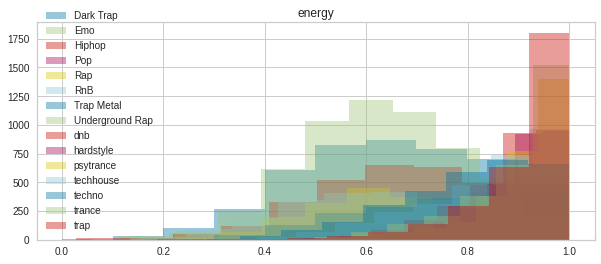

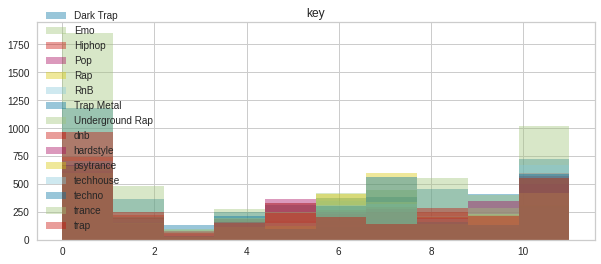

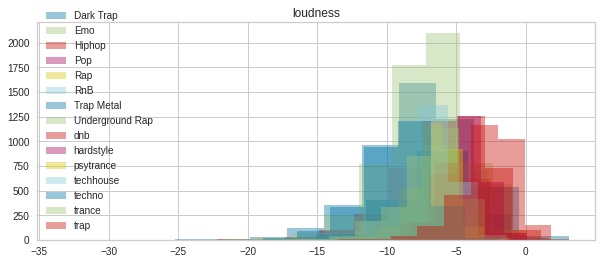

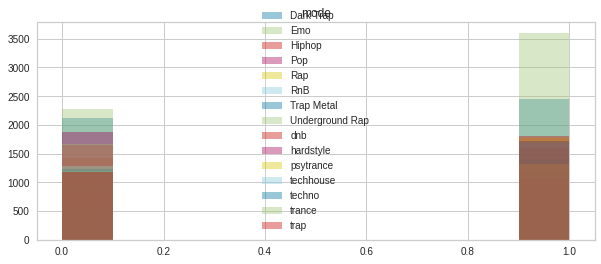

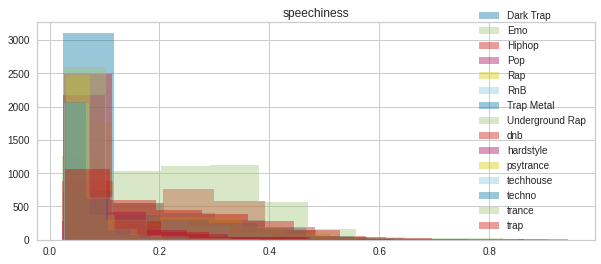

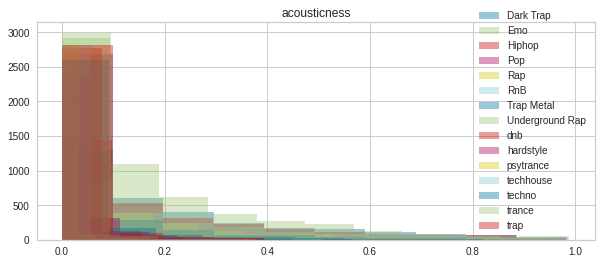

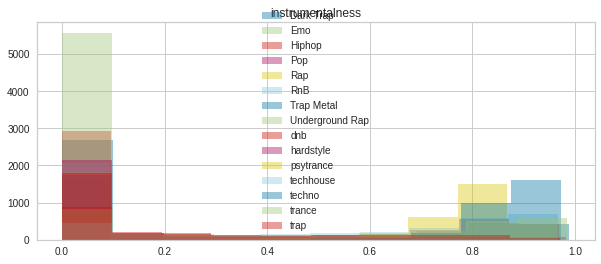

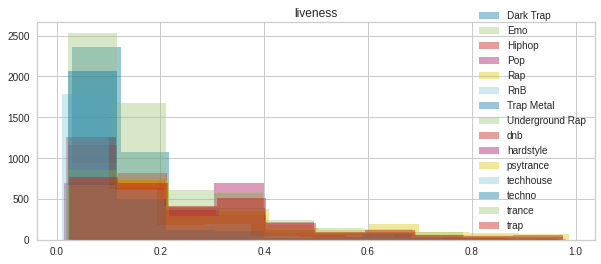

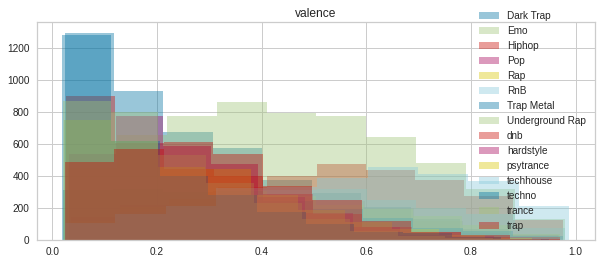

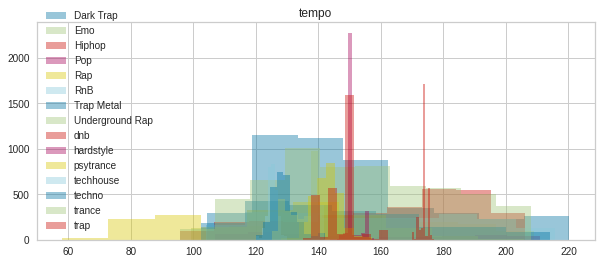

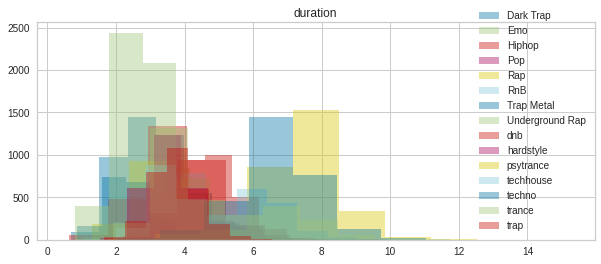

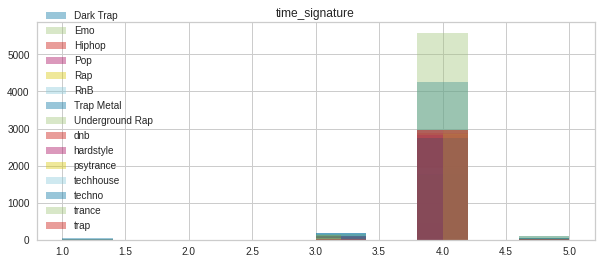

In [ ]:
# Distribuzioni delle feature raggruppate in base al genere
numeric = df._get_numeric_data()
grouped_genre = df.groupby('genre')

for col in numeric.columns:
    fig,ax = plt.subplots()
    
    for i, d in grouped_genre:
        d[col].hist(alpha = 0.4, ax = ax, label = i, figsize = (10,4))
        ax.set_title(col)

    ax.legend()
    plt.show()

In [ ]:
grouped_genre.mean()

danceability    energy       key  loudness      mode  \
genre                                                                   
Dark Trap            0.618834  0.646851  5.298384 -7.998401  0.536479   
Emo                  0.493699  0.761175  5.052976 -5.433641  0.685714   
Hiphop               0.698982  0.654418  5.553170 -7.014983  0.527741   
Pop                  0.676807  0.697638  5.399132 -5.632072  0.548807   
Rap                  0.742877  0.620083  5.048701 -6.887086  0.522186   
RnB                  0.674206  0.598884  5.021915 -6.899896  0.532158   
Trap Metal           0.647564  0.749157  4.663088 -5.879087  0.717791   
Underground Rap      0.744658  0.635776  5.059064 -7.362036  0.613617   
dnb                  0.520944  0.873433  5.619016 -4.063237  0.446055   
hardstyle            0.478027  0.896238  5.710831 -4.349444  0.360695   
psytrance            0.617462  0.902392  5.989531 -6.703383  0.598446   
techhouse            0.786794  0.834481  5.794622 -7.054302  0.567395   
techno               0.715742  0.795714  5.698917 -9.290230  0.582544   
trance               0.507724  0.892435  5.389797 -6.907600  0.442814   
trap                 0.593180  0.906060  5.024439 -2.725578  0.603616   

                 speechiness  acousticness  instrumentalness  liveness  \
genre                                                                    
Dark Trap           0.123434      0.159493          0.277276  0.185081   
Emo                 0.080325      0.143094          0.011402  0.195243   
Hiphop              0.217150      0.195569          0.017154  0.210581   
Pop                 0.088363      0.149251          0.013831  0.177949   
Rap                 0.217862      0.170566          0.006939  0.181320   
RnB                 0.143110      0.225276          0.007400  0.178984   
Trap Metal          0.209677      0.114926          0.057051  0.243655   
Underground Rap     0.224992      0.162708          0.025280  0.191116   
dnb                 0.083478      0.019543          0.459998  0.202883   
hardstyle           0.094624      0.040841          0.137431  0.273830   
psytrance           0.060425      0.006333          0.766458  0.293434   
techhouse           0.072255      0.014223          0.580083  0.141387   
techno              0.066170      0.039556          0.847089  0.149137   
trance              0.071306      0.012970          0.495374  0.296976   
trap                0.205966      0.024439          0.196289  0.276127   

                  valence       tempo  duration  time_signature  
genre                                                            
Dark Trap        0.273663  149.791186  3.128414        3.961337  
Emo              0.444145  153.888640  3.638619        3.938690  
Hiphop           0.523628  162.980479  3.799244        3.975561  
Pop              0.550264  152.098937  3.523189        3.984816  
Rap              0.440921  126.006374  3.383544        3.985931  
RnB              0.493974  157.533793  3.773354        3.960934  
Trap Metal       0.348786  148.684947  2.453333        3.953476  
Underground Rap  0.444629  152.914521  2.935894        3.979915  
dnb              0.253062  173.849166  4.775840        3.998314  
hardstyle        0.267171  150.659340  3.824779        3.964237  
psytrance        0.259625  142.688529  7.426278        3.961499  
techhouse        0.568175  124.927316  4.861445        3.993277  
techno           0.192331  128.971052  6.654340        3.945873  
trance           0.220285  134.625598  4.791861        3.985995  
trap             0.301178  147.691379  3.752933        3.987948

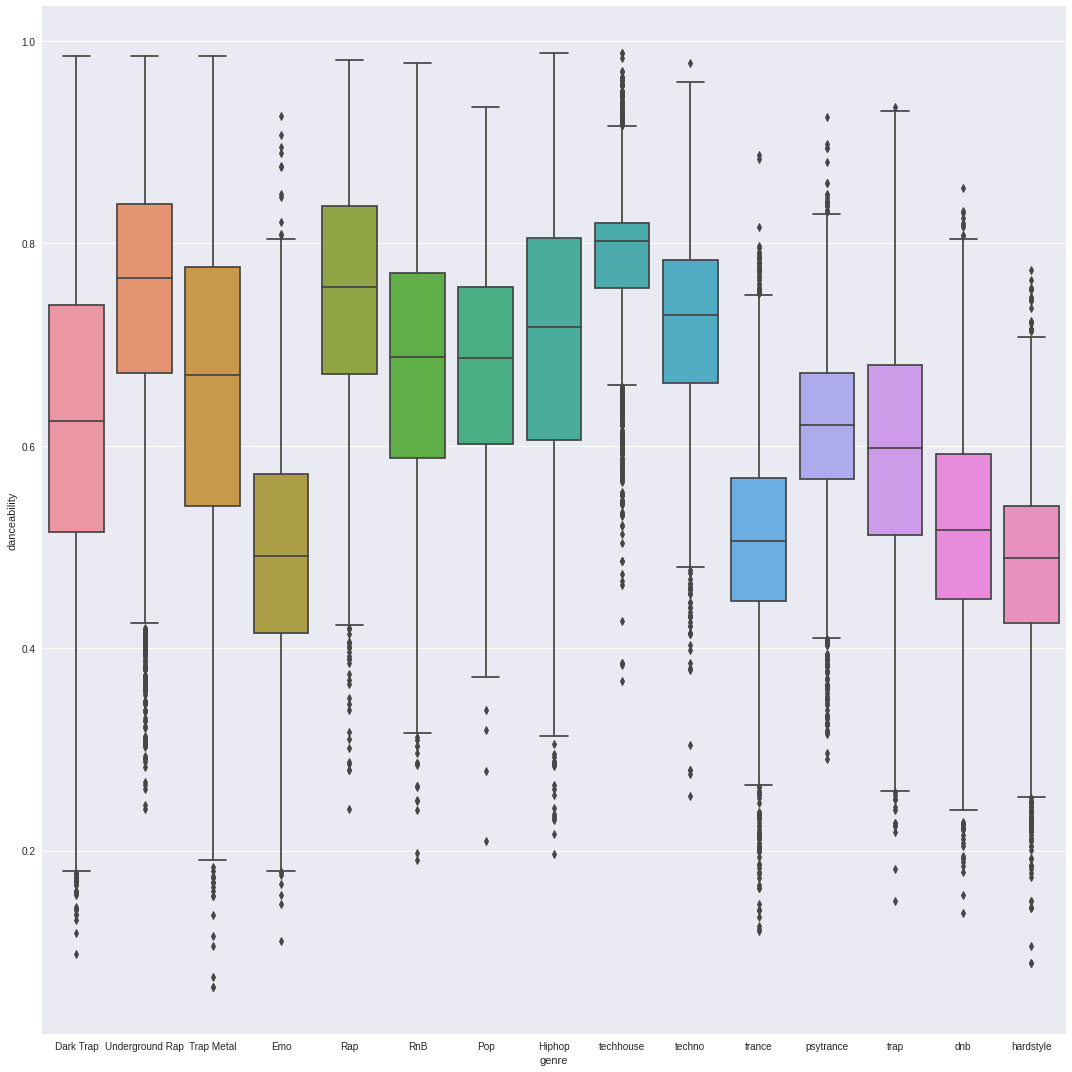

In [ ]:
style.use('seaborn')
sb.catplot(data = df, x = 'genre', y = 'danceability', kind = 'box', height = 15)

In [ ]:
px.box(data_frame = df, y = 'tempo', color = 'genre')

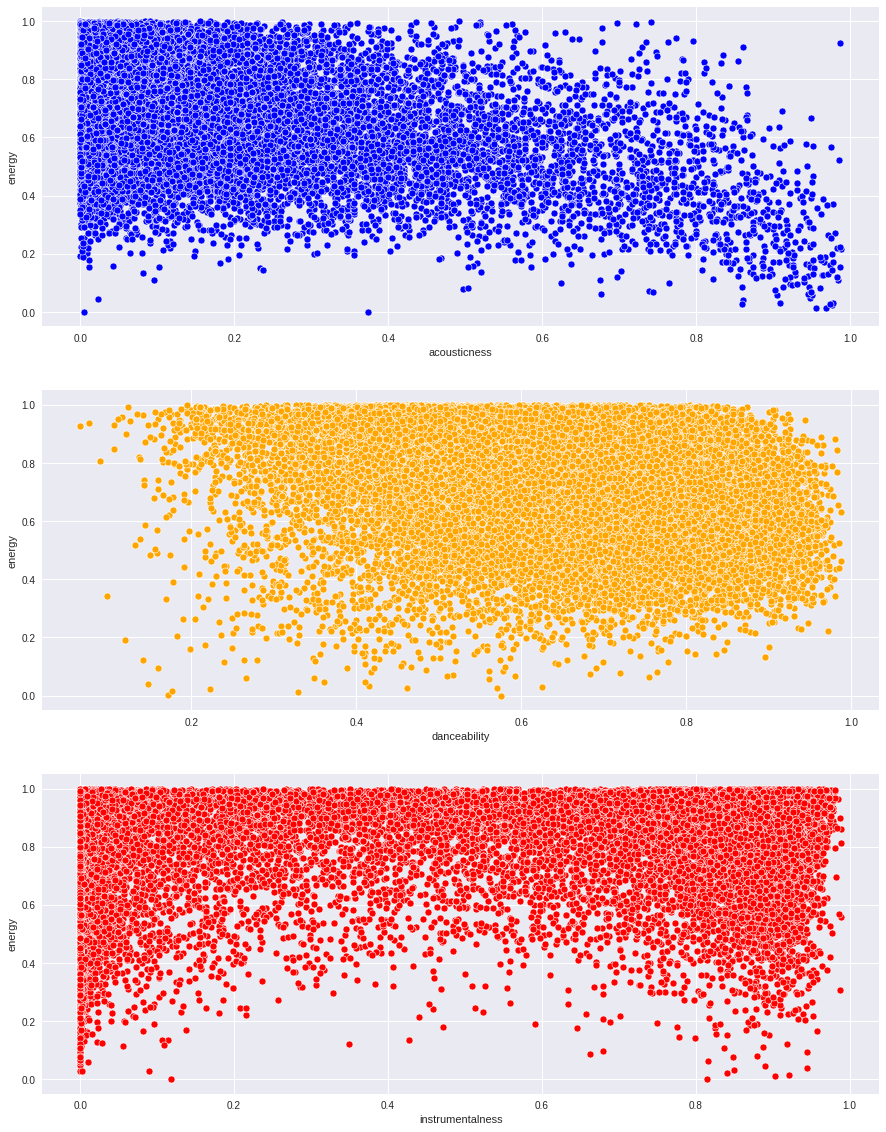

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (15,20))
sns.scatterplot(x = df['acousticness'], y = df['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = df['danceability'], y = df['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = df['instrumentalness'], y = df['energy'], ax = ax[2], color = "red")

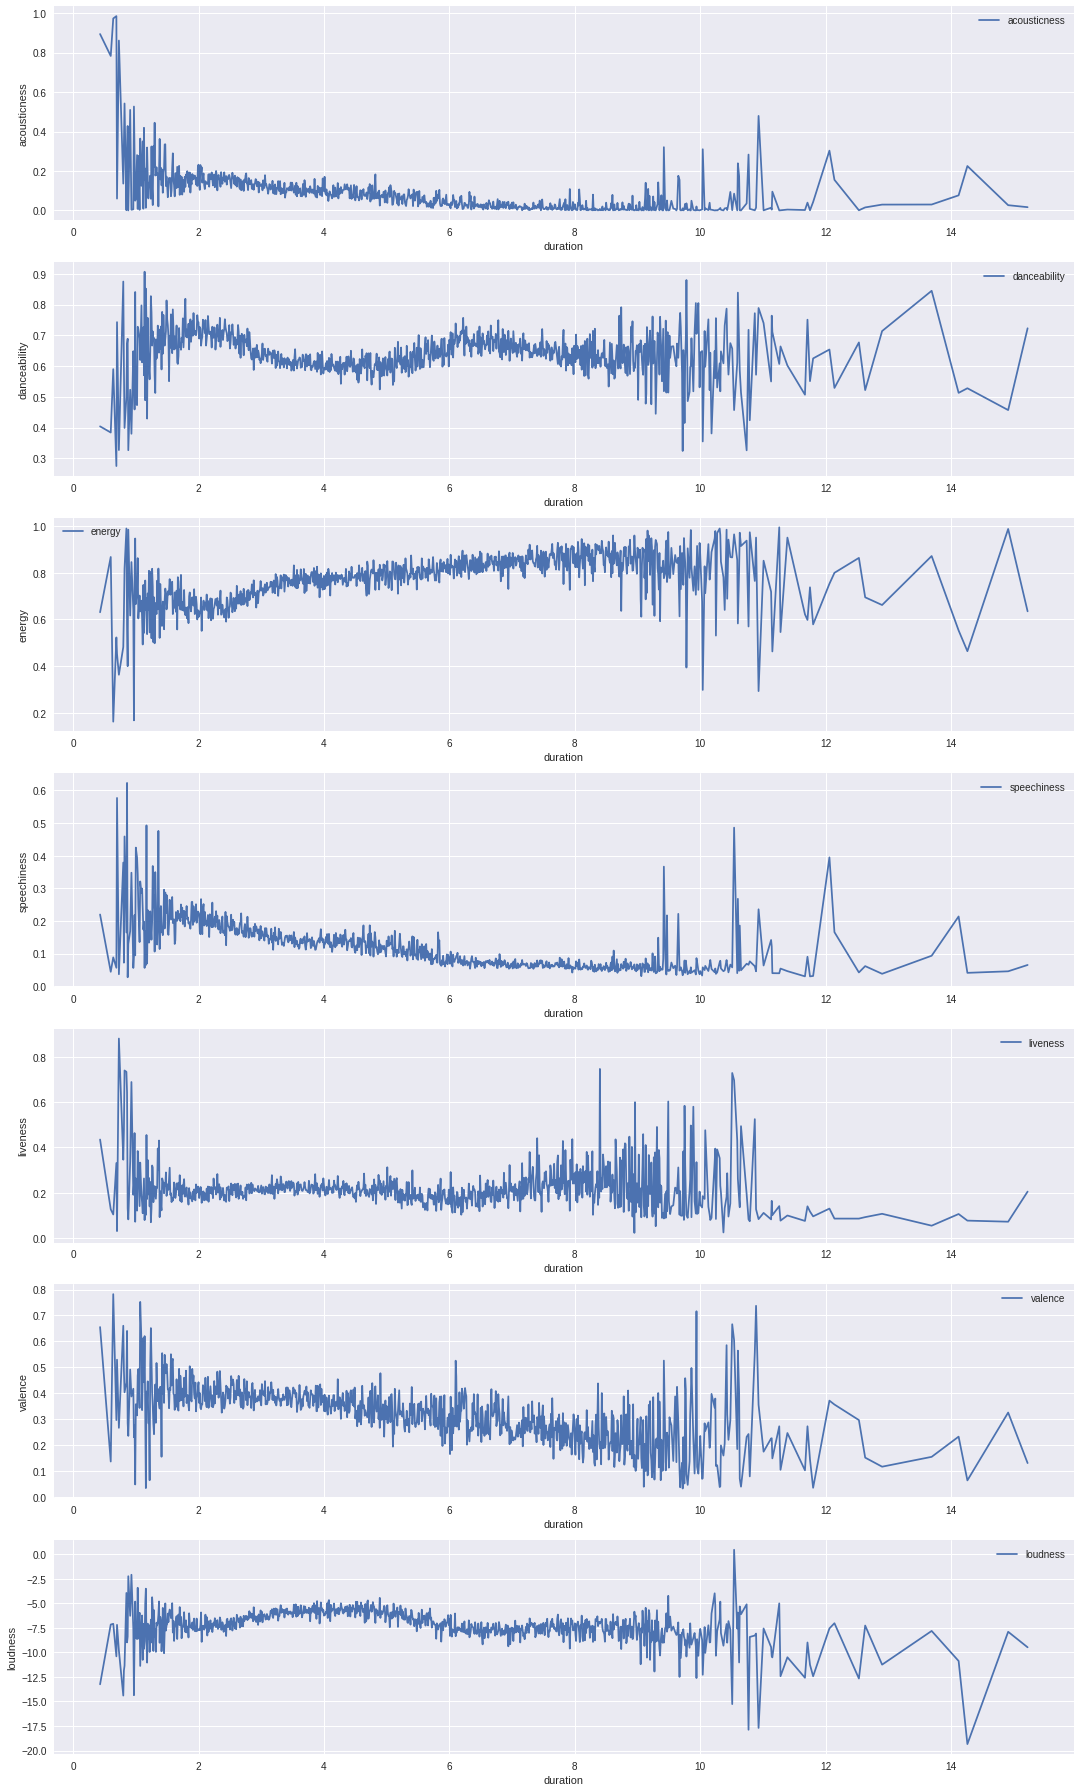

In [ ]:
fig, ax = plt.subplots(7, 1, figsize = (15, 25))
columns = ["acousticness","danceability","energy","speechiness","liveness","valence", "loudness"]
i = 0
for col in columns:
    x = df.groupby("duration")[col].mean()
    sns.lineplot(x=x.index,y=x,label=col, ax = ax[i])
    i += 1
plt.tight_layout()

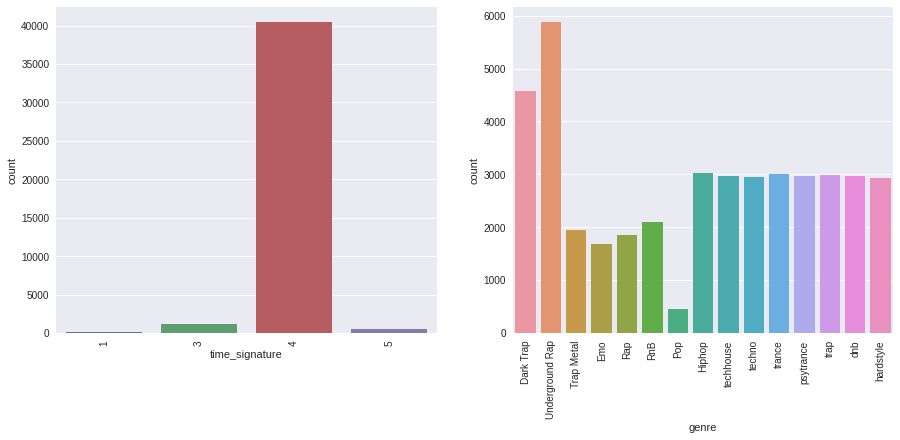

In [ ]:
categorical_cols = ['time_signature', 'genre']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)

plt.show()

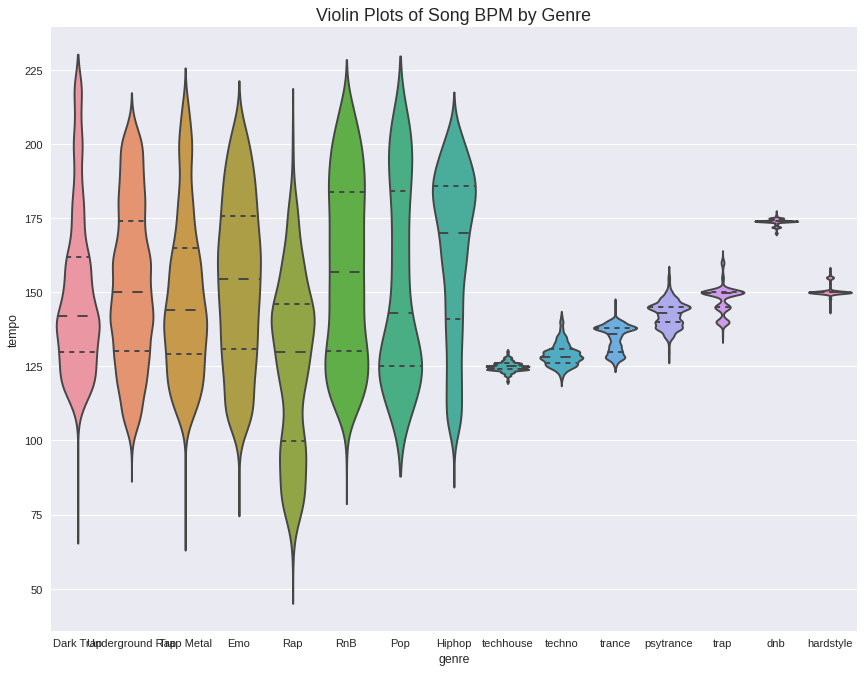

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='genre', y='tempo', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plots of Song BPM by Genre', fontsize=16)
plt.show()

# Normalizzazione

<h3> Conversione dei valori del genere da categorici a numerici

In [ ]:
df['genre'] = df["genre"].map( {'Dark Trap':1, 'Underground Rap':2, 'Trap Metal':3, 'Emo':4, 'Rap':5, 'RnB':6,
       'Pop':7, 'Hiphop':8, 'techhouse':9, 'techno':10, 'trance':11, 'psytrance':12,
       'trap':13, 'dnb':14, 'hardstyle':15})

x = df
x.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration  time_signature  \
0          0.013400    0.0556   0.3890  156.985      2.08               4   
1          0.000000    0.1180   0.1240  115.080      3.74               4   
2          0.000004    0.3720   0.0391  218.050      1.65               4   
3          0.000000    0.1140   0.1750  186.948      2.06               3   
4          0.000000    0.1660   0.5910  147.988      2.05               4   

   genre  
0      1  
1      1  
2      1  
3      1  
4      1

In [ ]:
# Escludiamo le colonne categoriche dal processo di normalizzazione
x_to_normalize = x.iloc[:,:-2]

# Normalizzazione
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_to_normalize)

# Conversione in dataframe 
x_scaled = pd.DataFrame(x_scaled)
# x_scaled = pd.concat([x_scaled,df.iloc[:,-2:]], axis=1)
x_scaled

0         1         2         3    4         5         6   \
0      0.829884  0.813955  0.181818  0.712039  1.0  0.430304  0.060525   
1      0.708527  0.492877  0.727273  0.715710  1.0  0.061410  0.405870   
2      0.850471  0.892974  0.454545  0.782742  1.0  0.042890  0.013967   
3      0.445227  0.780947  0.000000  0.784742  1.0  0.086971  0.023987   
4      0.794127  0.623909  0.181818  0.703712  1.0  0.292754  0.219635   
...         ...       ...       ...       ...  ...       ...       ...   
42300  0.501571  0.692925  0.363636  0.772743  1.0  0.008340  0.031882   
42301  0.489652  0.767944  0.000000  0.696754  0.0  0.027293  0.022772   
42302  0.320620  0.820956  0.727273  0.828791  1.0  0.030109  0.026315   
42303  0.446311  0.920981  0.545455  0.782906  0.0  0.017871  0.000557   
42304  0.502655  0.944987  0.818182  0.753184  1.0  0.042023  0.001912   

             7         8         9         10        11  
0      0.013549  0.045943  0.382028  0.610006  0.111562  
1      0.000000  0.109792  0.108635  0.351848  0.223800  
2      0.000004  0.369692  0.021046  0.986200  0.082488  
3      0.000000  0.105699  0.161250  0.794595  0.110210  
4      0.000000  0.158907  0.590426  0.554579  0.109533  
...         ...       ...       ...       ...       ...  
42300  0.000349  0.112862  0.387187  0.567055  0.274510  
42301  0.000018  0.198813  0.375838  0.566531  0.207573  
42302  0.000245  0.382994  0.108635  0.597377  0.235294  
42303  0.029929  0.047887  0.484164  0.567233  0.335362  
42304  0.000055  0.412668  0.118952  0.598067  0.153482  

[42305 rows x 12 columns]

In [ ]:
pd.DataFrame(x_scaled).describe()

0             1             2             3             4   \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.622239      0.762458      0.488204      0.736654      0.549462   
std        0.169701      0.183868      0.333286      0.080569      0.497553   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.497237      0.631911      0.090909      0.690207      0.000000   
50%        0.629429      0.802952      0.545455      0.742994      1.000000   
75%        0.759454      0.922981      0.818182      0.790138      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 5             6             7             8             9   \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.123319      0.097327      0.286196      0.208103      0.349119   
std        0.136649      0.172902      0.374915      0.179654      0.240586   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.028593      0.001750      0.000000      0.090965      0.146807   
50%        0.057186      0.016598      0.006006      0.127187      0.312906   
75%        0.184447      0.108299      0.730030      0.289880      0.519241   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 10            11  
count  42305.000000  42305.000000  
mean       0.551413      0.253623  
std        0.146896      0.116022  
min        0.000000      0.000000  
25%        0.443338      0.173766  
50%        0.536005      0.224476  
75%        0.637599      0.310345  
max        1.000000      1.000000

# Clustering multidimensionale

## PCA

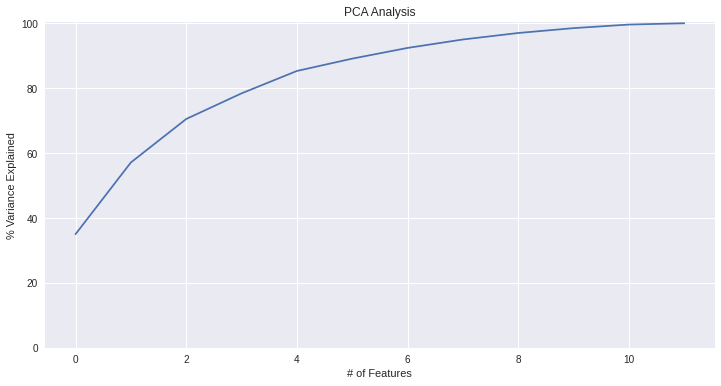

In [ ]:
pca = PCA(n_components = len(x_scaled.columns) )
pca.fit(x_scaled)
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(variance,3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [ ]:
pca = PCA(n_components=2).fit(x_scaled)
x_pca = pca.transform(x_scaled)
x_scaled.shape, x_pca.shape

((42305, 12), (42305, 2))

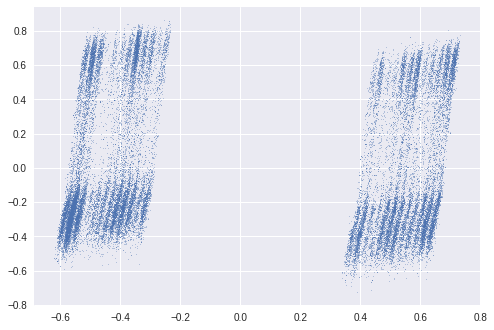

In [ ]:
cmap = cm.get_cmap('gnuplot')
plt.scatter(x_pca[:,0], x_pca[:, 1], s = 0.1,)

## K-Means

<h3> cross-validation per determinare il numero ottimale di cluster, si utilizza la silhouette come metrica

In [ ]:
scores = []
for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_, metric='euclidean')
    print(k, score)

2 0.5897929009284798
3 0.647278183820457
4 0.7323946085854038


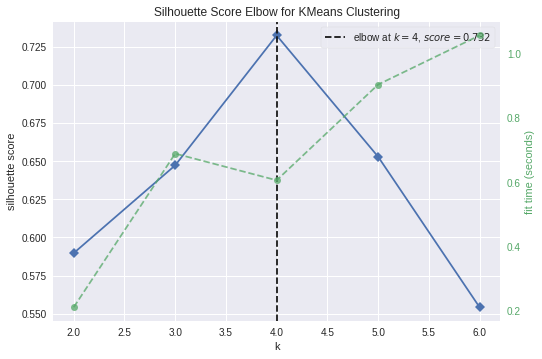

Optimal number of clusters: 4


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(x_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

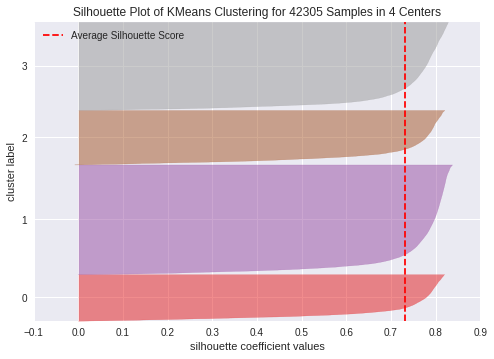

In [ ]:
for i in range(4, 5):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(x_pca)    
  sil_visualizer.show()

<h3> Alleniamo il modello con le performance migliori

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_pca)

KMeans(n_clusters=4, random_state=42)

<h3> Centroidi

In [ ]:
# Le dimensioni però sono quelle della PCA
centers = kmeans.cluster_centers_

# Antitrasformata per tornare nelle dimensioni originali
centers_original = pd.DataFrame(pca.inverse_transform(centers), columns = x.columns[:-2])

centers_original

danceability    energy       key  loudness      mode  speechiness  \
0      0.568560  0.864372  0.690223  0.726315  0.019607     0.037396   
1      0.654964  0.707726  0.339929  0.741734  0.983401     0.169803   
2      0.597255  0.856136  0.425218  0.724198  0.996249     0.046461   
3      0.625281  0.718876  0.605111  0.743489  0.012637     0.158328   

   acousticness  instrumentalness  liveness   valence     tempo  duration  
0      0.020806          0.755653  0.212515  0.226166  0.511043  0.353358  
1      0.135673          0.042951  0.206118  0.413630  0.571399  0.201025  
2      0.009800          0.773188  0.214558  0.226600  0.503715  0.351320  
3      0.144103          0.040094  0.204255  0.409465  0.577334  0.206051

In [ ]:
# per ogni elemento c'è una colonna che rappresenta il cluster predetto
predicted = pd.DataFrame(kmeans.predict(x_pca), columns=["cluster"])

# trasformiamo il dataset portandolo nello spazio di partenza
predicted_t = pd.DataFrame(pca.inverse_transform(x_pca), columns = x.columns[:-2] )

# concateniamo i due dataframe, otteniamo il dataset con affianco la colonna della predizione
predictions = pd.concat([predicted_t, predicted ], axis=1)

# concateniamo il genere

x['genre'] = x["genre"].map( {1:'Dark Trap', 2:'Underground Rap', 3:'Trap Metal', 4:'Emo', 5:'Rap', 6:'RnB',
       7:'Pop', 8:'Hiphop', 9:'techhouse', 10:'techno', 11:'trance', 12:'psytrance',
       13:'trap', 14:'dnb', 15:'hardstyle'})


predictions = pd.concat([predictions,x["genre"] ], axis=1)

predictions

danceability    energy       key  loudness      mode  speechiness  \
0          0.662260  0.693091  0.315129  0.743269  1.043680     0.182106   
1          0.650681  0.713205  0.365046  0.741348  0.901380     0.165062   
2          0.649864  0.719985  0.350372  0.740326  0.971703     0.159585   
3          0.657350  0.707824  0.315230  0.741429  1.076368     0.169932   
4          0.668639  0.676563  0.306116  0.745228  1.040425     0.195837   
...             ...       ...       ...       ...       ...          ...   
42300      0.652831  0.713478  0.342173  0.741042  0.987886     0.165032   
42301      0.631611  0.711760  0.564647  0.743898  0.148615     0.164552   
42302      0.640883  0.737670  0.382022  0.738492  0.892549     0.144705   
42303      0.619298  0.734022  0.614778  0.741711  0.010332     0.145732   
42304      0.639960  0.738820  0.387538  0.738413  0.874416     0.143707   

       acousticness  instrumentalness  liveness   valence     tempo  duration  \
0          0.146952         -0.025402  0.205444  0.431447  0.577376  0.186601   
1          0.132544          0.065009  0.206218  0.407565  0.569836  0.206041   
2          0.125510          0.102514  0.206782  0.398310  0.565953  0.213358   
3          0.133878          0.048956  0.206362  0.412561  0.570300  0.201724   
4          0.161004         -0.106833  0.204499  0.452294  0.584934  0.169852   
...             ...               ...       ...       ...       ...       ...   
42300      0.130721          0.071488  0.206455  0.406341  0.568731  0.206875   
42301      0.147624          0.013194  0.204201  0.417043  0.579030  0.199726   
42302      0.111996          0.184735  0.207581  0.376845  0.558803  0.230746   
42303      0.131324          0.114400  0.205107  0.390415  0.570468  0.221366   
42304      0.111357          0.189311  0.207599  0.375581  0.558485  0.231793   

       cluster      genre  
0            1  Dark Trap  
1            1  Dark Trap  
2            1  Dark Trap  
3            1  Dark Trap  
4            1  Dark Trap  
...        ...        ...  
42300        1  hardstyle  
42301        3  hardstyle  
42302        1  hardstyle  
42303        3  hardstyle  
42304        1  hardstyle  

[42305 rows x 14 columns]

In [ ]:
predictions.groupby(["cluster","genre"])["genre"].count()

cluster  genre          
0        Dark Trap           765
         Emo                   4
         Hiphop               17
         Pop                   3
         Rap                   3
         RnB                   8
         Trap Metal           38
         Underground Rap      44
         dnb                 955
         hardstyle           288
         psytrance          1160
         techhouse           872
         techno             1202
         trance              978
         trap                252
1        Dark Trap          1757
         Emo                1136
         Hiphop             1576
         Pop                 251
         Rap                 960
         RnB                1113
         Trap Metal         1330
         Underground Rap    3527
         dnb                 587
         hardstyle           848
         psytrance            50
         techhouse           541
         techno               29
         trance              466
         trap     

## DBSCAN

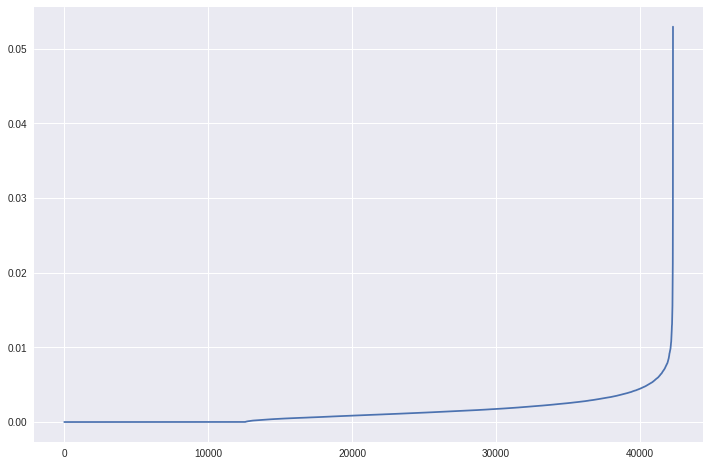

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_pca)
distances, indices = nbrs.kneighbors(x_pca)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
dbscan=DBSCAN(eps=0.1,min_samples=2,metric='euclidean')
model=dbscan.fit(x_pca)
labels=model.labels_
Counter(labels)

Counter({0: 23245, 1: 19060})

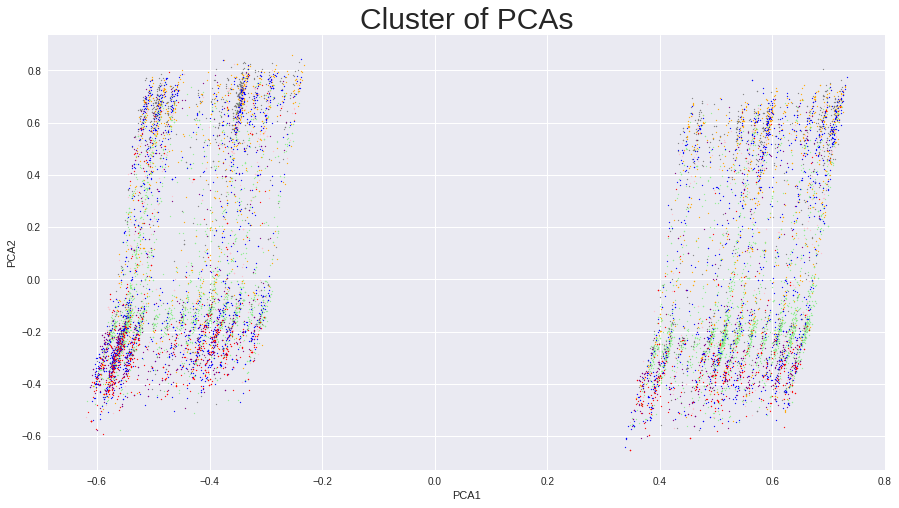

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(x_pca[labels == 0, 0], x_pca[labels == 0, 1], s = 1, c = 'pink')
plt.scatter(x_pca[labels == 1, 0], x_pca[labels == 1, 1], s = 1, c = 'orange')
plt.scatter(x_pca[labels == 2, 0], x_pca[labels == 2, 1], s = 1, c = 'lightgreen')
plt.scatter(x_pca[labels == 3, 0], x_pca[labels == 3, 1], s = 1, c = 'blue')
plt.scatter(x_pca[labels == 4, 0], x_pca[labels == 4, 1], s = 1, c = 'gray')
plt.scatter(x_pca[labels == 5, 0], x_pca[labels == 5, 1], s = 1, c = 'red')
plt.scatter(x_pca[labels == 6, 0], x_pca[labels == 6, 1], s = 1, c = 'purple')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Clustering tridimensionale

## Danceability - Tempo - Energy

In [ ]:
df_dte = df[['danceability','tempo','energy']]

df_dte

danceability    tempo  energy
0             0.831  156.985   0.814
1             0.719  115.080   0.493
2             0.850  218.050   0.893
3             0.476  186.948   0.781
4             0.798  147.988   0.624
...             ...      ...     ...
42300         0.528  150.013   0.693
42301         0.517  149.928   0.768
42302         0.361  154.935   0.821
42303         0.477  150.042   0.921
42304         0.529  155.047   0.945

[42305 rows x 3 columns]

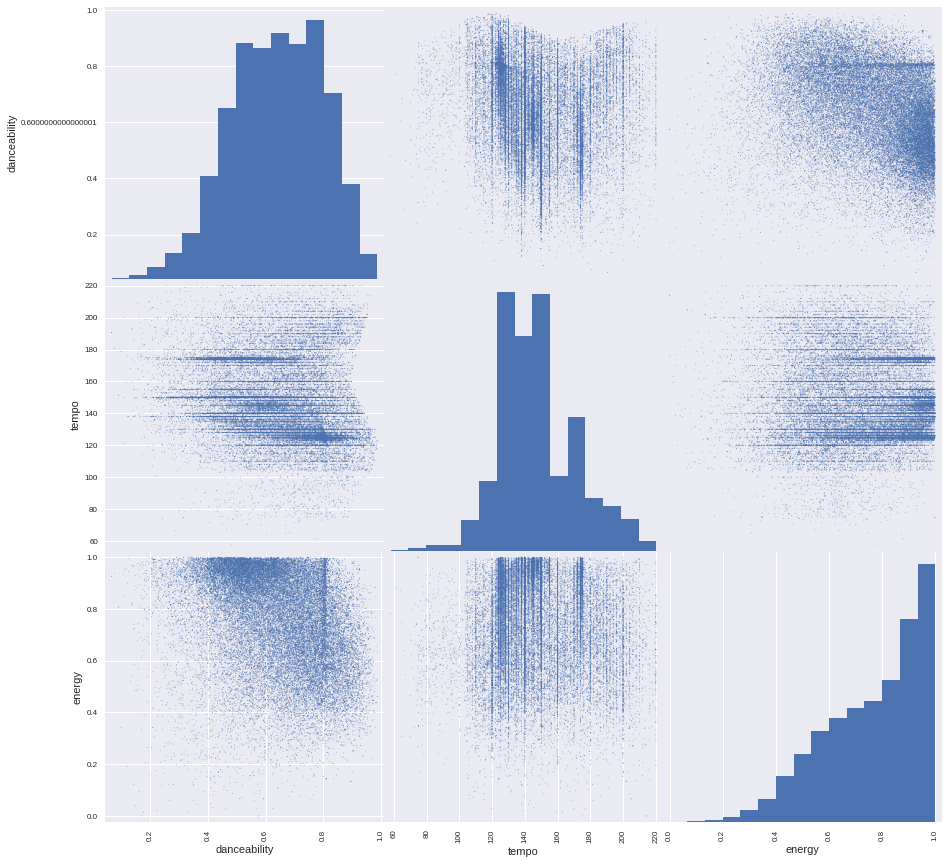

In [ ]:
scatter = pd.plotting.scatter_matrix(df_dte, marker = 'o', s=1, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

### K-Means

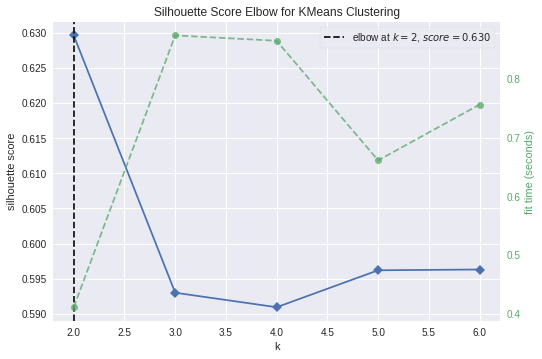

Optimal number of clusters: 2


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(df_dte)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

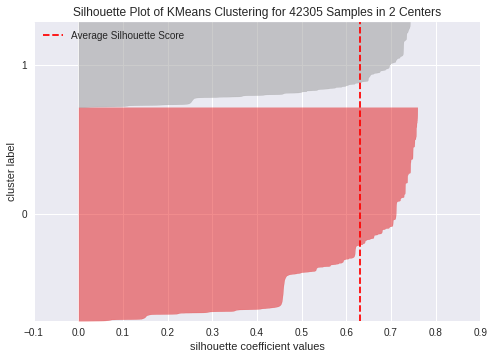

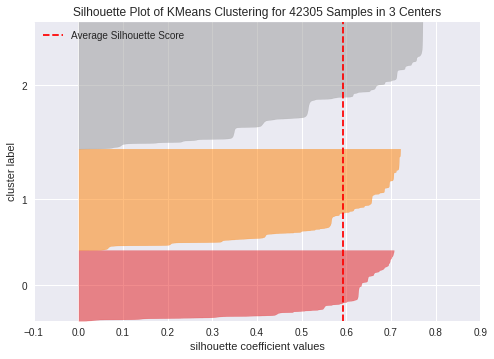

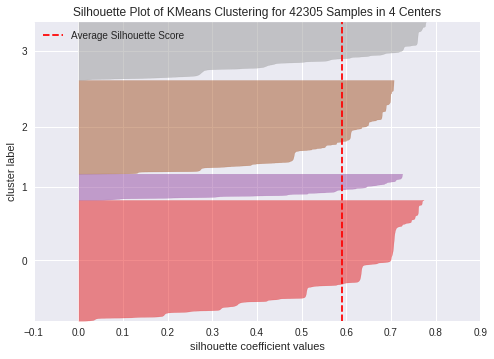

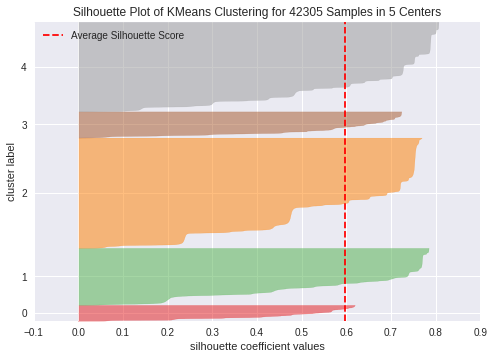

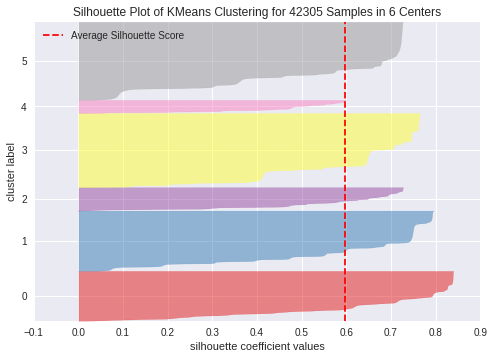

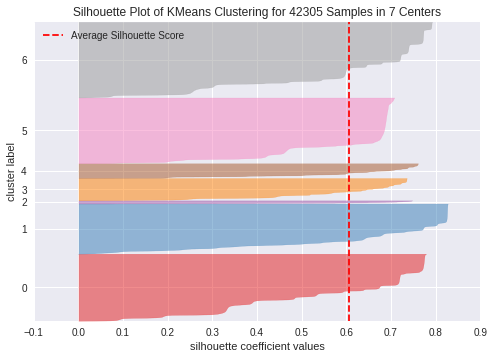

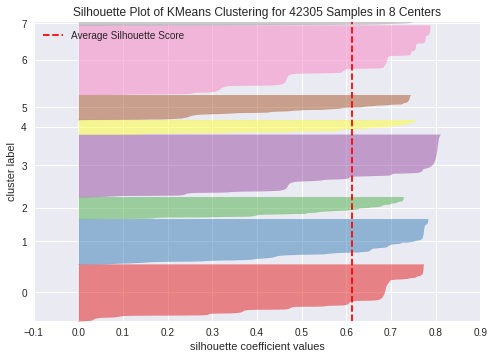

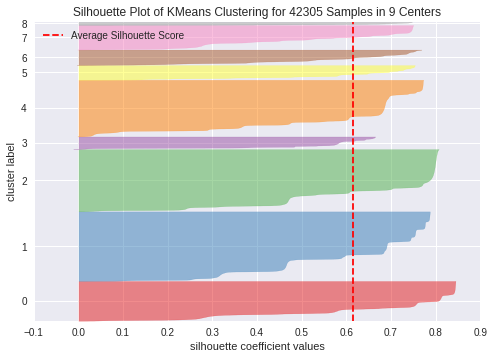

In [ ]:
for i in range(2, 10):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(df_dte)    
  sil_visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_dte)

predicted = pd.DataFrame(kmeans.predict(df_dte), columns=["cluster"])
predictions = pd.concat([df_dte, predicted ], axis=1)

predictions

danceability    tempo  energy  cluster
0             0.831  156.985   0.814        0
1             0.719  115.080   0.493        2
2             0.850  218.050   0.893        1
3             0.476  186.948   0.781        1
4             0.798  147.988   0.624        0
...             ...      ...     ...      ...
42300         0.528  150.013   0.693        0
42301         0.517  149.928   0.768        0
42302         0.361  154.935   0.821        0
42303         0.477  150.042   0.921        0
42304         0.529  155.047   0.945        0

[42305 rows x 4 columns]

In [ ]:
df_dte

danceability    tempo  energy
0             0.831  156.985   0.814
1             0.719  115.080   0.493
2             0.850  218.050   0.893
3             0.476  186.948   0.781
4             0.798  147.988   0.624
...             ...      ...     ...
42300         0.528  150.013   0.693
42301         0.517  149.928   0.768
42302         0.361  154.935   0.821
42303         0.477  150.042   0.921
42304         0.529  155.047   0.945

[42305 rows x 3 columns]

In [ ]:
df_dte = df_dte.iloc[:,:].values

Text(0.5, 0, 'Energy')

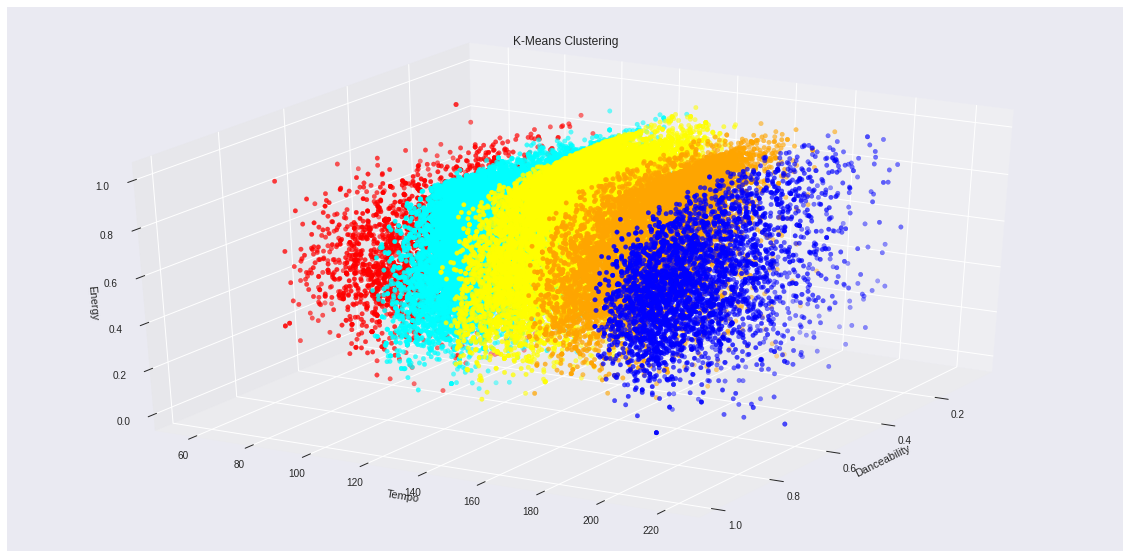

In [ ]:
# modello con 5 cluster
kmeans = KMeans(n_clusters = 5)

# alleno il modello
y_means = kmeans.fit_predict(df_dte)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 30)

x = np.array(y_means==0)
y = np.array(y_means==1)
z = np.array(y_means==2)
v = np.array(y_means==3)
w = np.array(y_means==4)


ax.scatter(df_dte[x][:, 0], df_dte[x][:, 1], df_dte[x][:, 2], color='red')
ax.scatter(df_dte[y][:, 0], df_dte[y][:, 1], df_dte[y][:, 2], color='blue')
ax.scatter(df_dte[z][:, 0], df_dte[z][:, 1], df_dte[z][:, 2], color='yellow')
ax.scatter(df_dte[v][:, 0], df_dte[v][:, 1], df_dte[v][:, 2], color='orange')
ax.scatter(df_dte[w][:, 0], df_dte[w][:, 1], df_dte[w][:, 2], color='cyan')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker='x', s=20, linewidths=10, color='magenta', zorder=50)

plt.title('K-Means Clustering')

ax.set_xlabel('Danceability')
ax.set_ylabel('Tempo')
ax.set_zlabel('Energy')

### DBSCAN

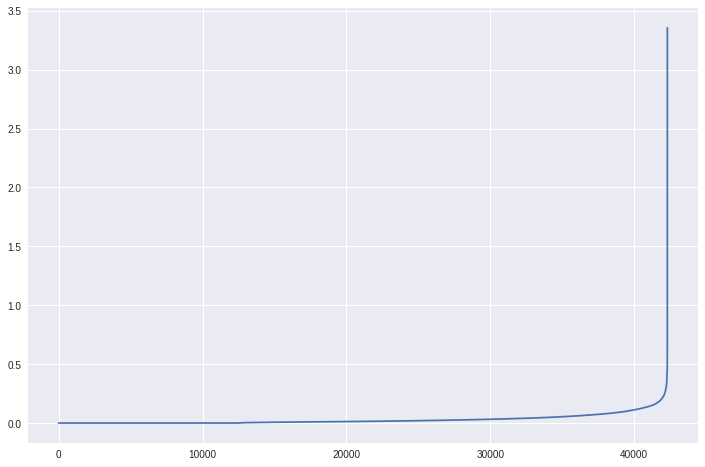

In [ ]:
neigh = NearestNeighbors(n_neighbors=15)
nbrs = neigh.fit(df_dte)
distances, indices = nbrs.kneighbors(df_dte)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=300,metric='euclidean')
model=dbscan.fit(df_dte)
labels=model.labels_
Counter(labels)

Counter({-1: 13240,
         19: 584,
         0: 1432,
         1: 1605,
         9: 496,
         8: 1430,
         2: 4620,
         3: 2488,
         4: 1378,
         5: 997,
         6: 947,
         7: 1630,
         13: 523,
         18: 1931,
         17: 585,
         10: 666,
         11: 499,
         12: 703,
         21: 513,
         14: 1050,
         15: 547,
         26: 375,
         16: 417,
         23: 402,
         22: 376,
         20: 628,
         24: 1108,
         25: 406,
         27: 729})

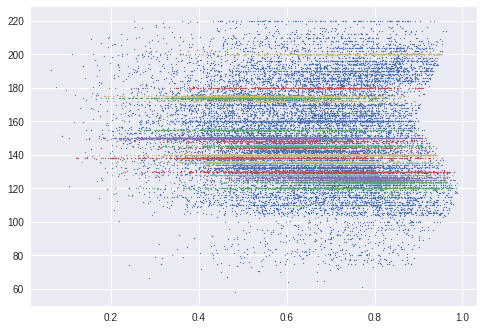

In [ ]:
#plotting the results:
u_labels = np.unique(labels)
for i in u_labels:

    plt.scatter(df_dte[labels == i , 0] , df_dte[labels == i , 1] , label = i, s=1)

#plt.legend()

plt.show()

# Clustering bidimensionale

## Danceability - Tempo

In [ ]:
df_dt = df[['danceability','tempo']]

df_dt

danceability    tempo
0             0.831  156.985
1             0.719  115.080
2             0.850  218.050
3             0.476  186.948
4             0.798  147.988
...             ...      ...
42300         0.528  150.013
42301         0.517  149.928
42302         0.361  154.935
42303         0.477  150.042
42304         0.529  155.047

[42305 rows x 2 columns]

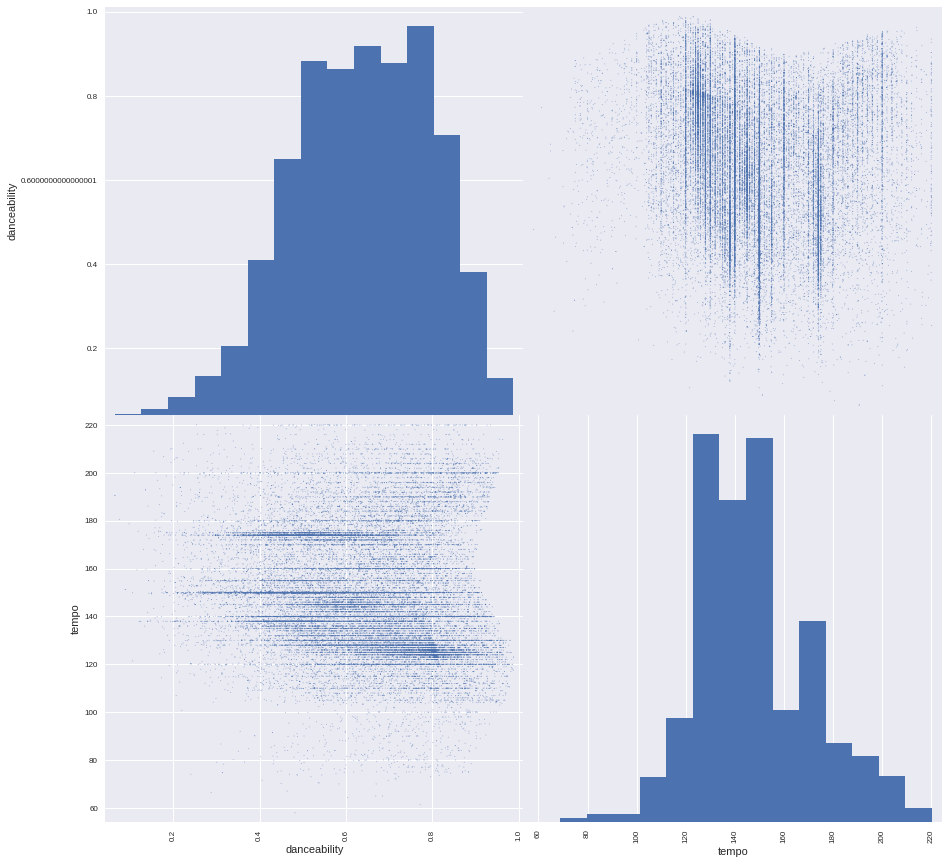

In [ ]:
scatter = pd.plotting.scatter_matrix(df_dt, marker = 'o', s=1, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

### K-Means

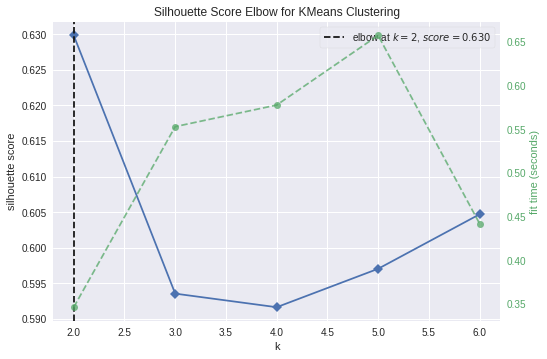

Optimal number of clusters: 2


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(df_dt)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

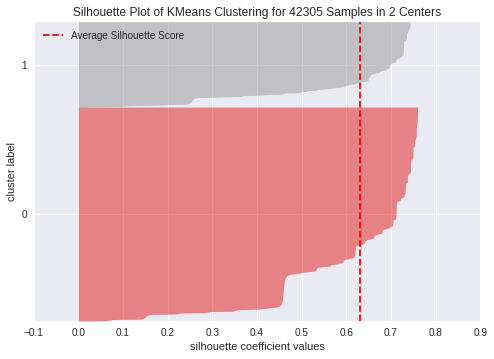

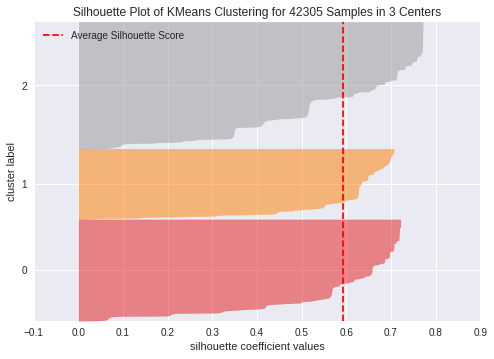

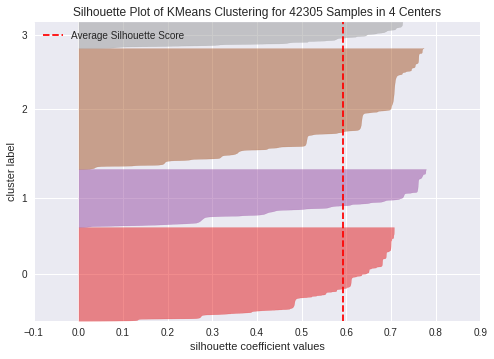

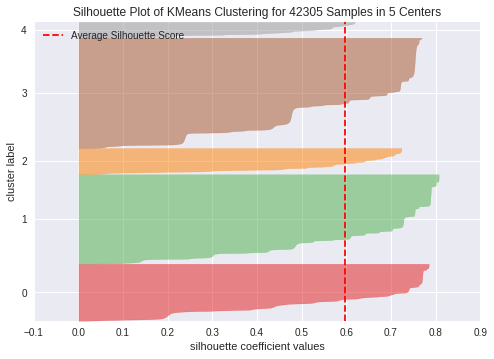

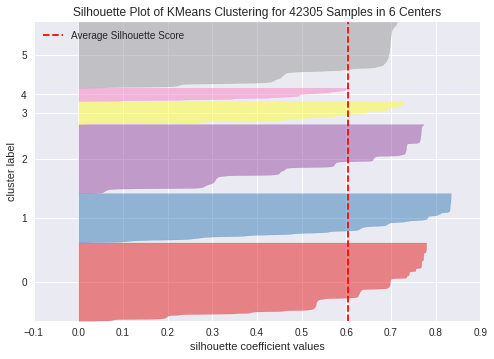

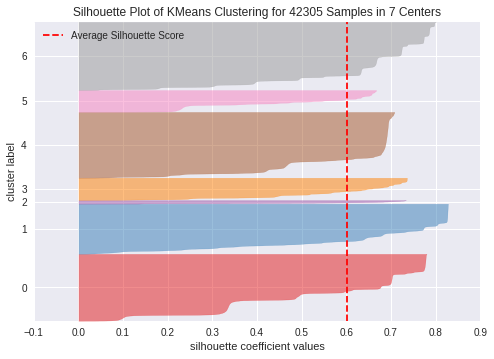

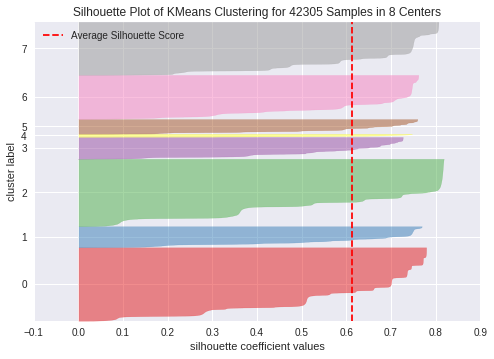

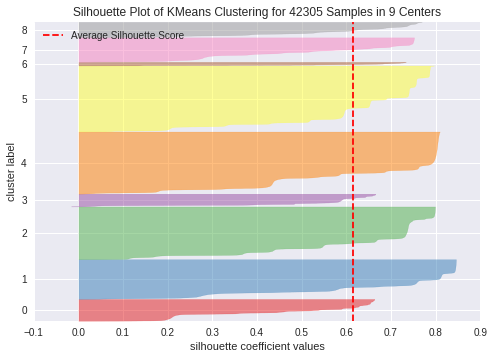

In [ ]:
for i in range(2, 10):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(df_dt)    
  sil_visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_dt)

predicted = pd.DataFrame(kmeans.predict(df_dt), columns=["cluster"])
predictions = pd.concat([df_dt, predicted ], axis=1)

predictions

danceability    tempo  cluster
0             0.831  156.985        2
1             0.719  115.080        0
2             0.850  218.050        3
3             0.476  186.948        3
4             0.798  147.988        2
...             ...      ...      ...
42300         0.528  150.013        2
42301         0.517  149.928        2
42302         0.361  154.935        2
42303         0.477  150.042        2
42304         0.529  155.047        2

[42305 rows x 3 columns]

In [ ]:
df_dt

danceability    tempo
0             0.831  156.985
1             0.719  115.080
2             0.850  218.050
3             0.476  186.948
4             0.798  147.988
...             ...      ...
42300         0.528  150.013
42301         0.517  149.928
42302         0.361  154.935
42303         0.477  150.042
42304         0.529  155.047

[42305 rows x 2 columns]

In [ ]:
df_dt = df_dt.iloc[:,:].values

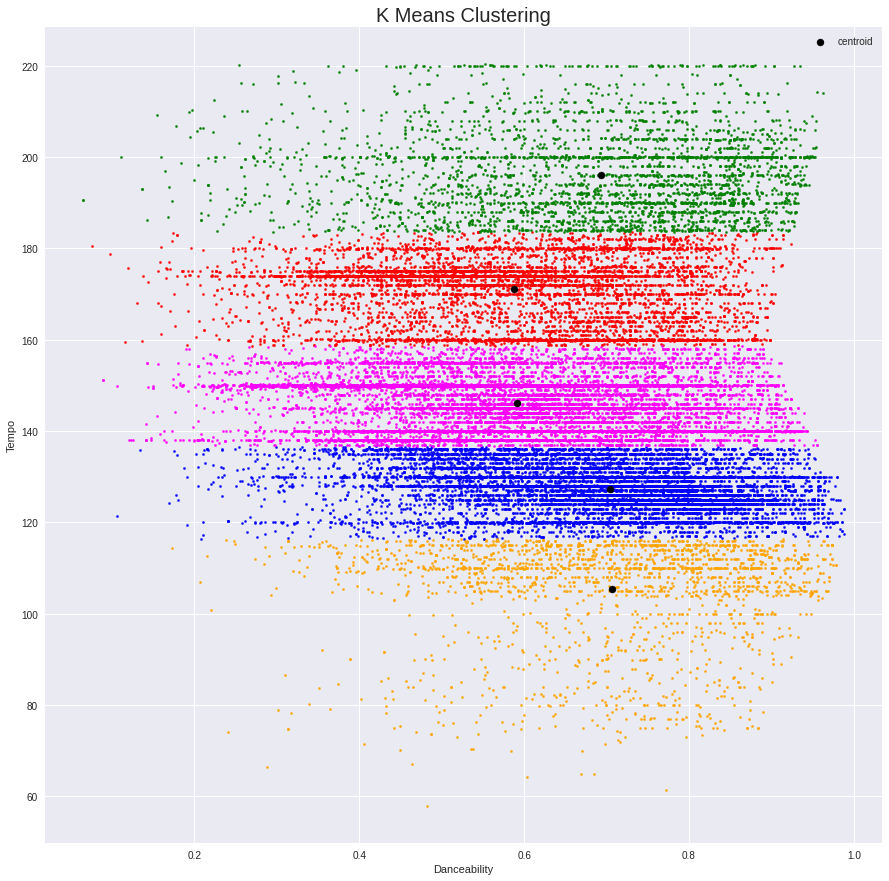

In [ ]:
# modello con 5 cluster
kmeans = KMeans(n_clusters = 5)

# alleno il modello
y_means = kmeans.fit_predict(df_dt)

# plot dei vari cluster
plt.figure(figsize=(15,15))

# qui sto vedendo quelli che guadagnano poco e spendono molto
plt.scatter(df_dt[y_means == 0, 0], df_dt[y_means == 0, 1], s = 5, c = 'red')
plt.scatter(df_dt[y_means == 1, 0], df_dt[y_means == 1, 1], s = 5, c = 'blue')
plt.scatter(df_dt[y_means == 2, 0], df_dt[y_means == 2, 1], s = 5, c = 'green')
plt.scatter(df_dt[y_means == 3, 0], df_dt[y_means == 3, 1], s = 5, c = 'magenta')
plt.scatter(df_dt[y_means == 4, 0], df_dt[y_means == 4, 1], s = 5, c = 'orange')
# centroidi
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.legend()
plt.show()

### DBSCAN

## Tempo - Energy

In [ ]:
df_te = df[['tempo','energy']]

df_te

tempo  energy
0      156.985   0.814
1      115.080   0.493
2      218.050   0.893
3      186.948   0.781
4      147.988   0.624
...        ...     ...
42300  150.013   0.693
42301  149.928   0.768
42302  154.935   0.821
42303  150.042   0.921
42304  155.047   0.945

[42305 rows x 2 columns]

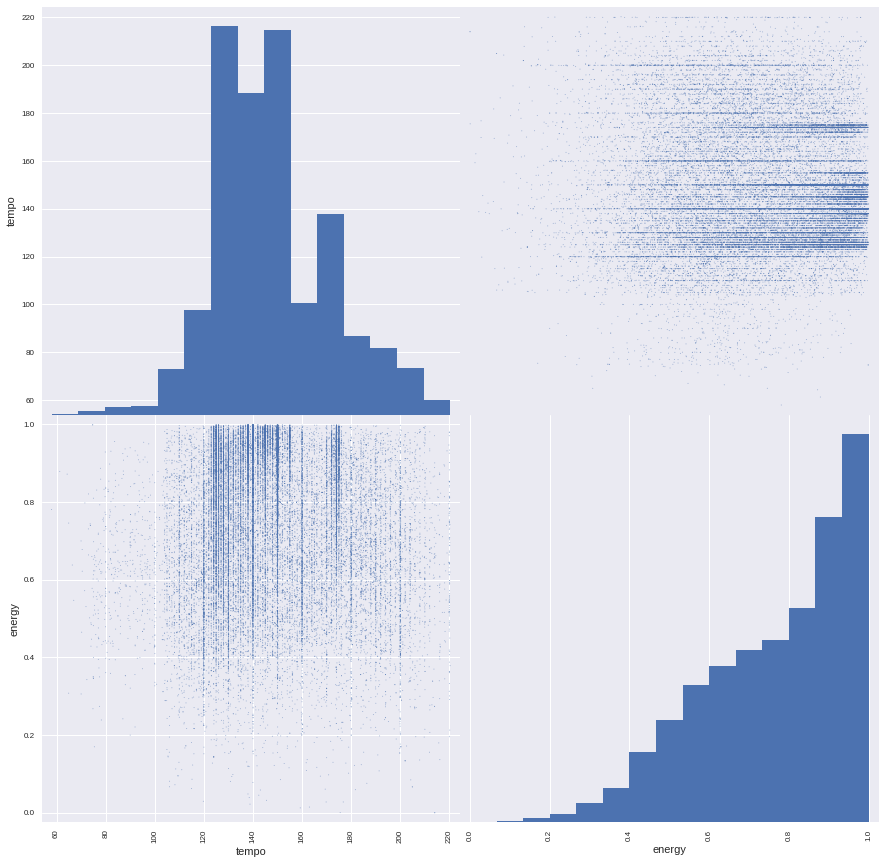

In [ ]:
scatter = pd.plotting.scatter_matrix(df_te, marker = 'o', s=1, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

### K-Means

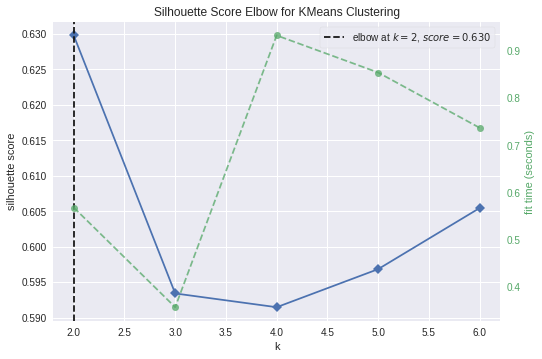

Optimal number of clusters: 2


In [ ]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), metric="silhouette", k=(2,7))
visualizer.fit(df_te)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

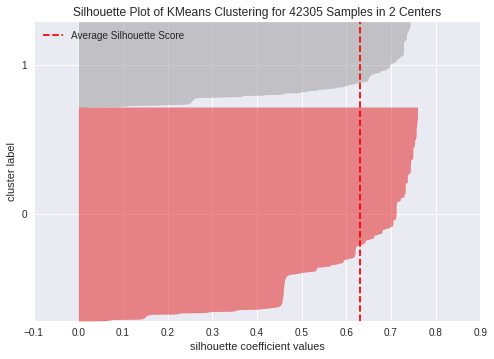

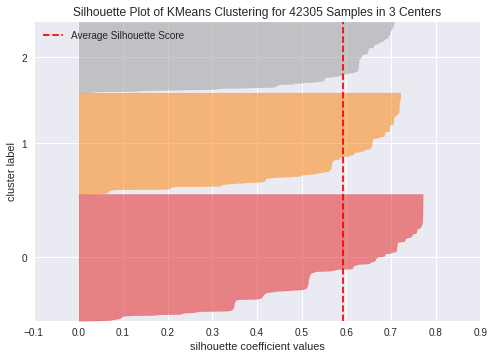

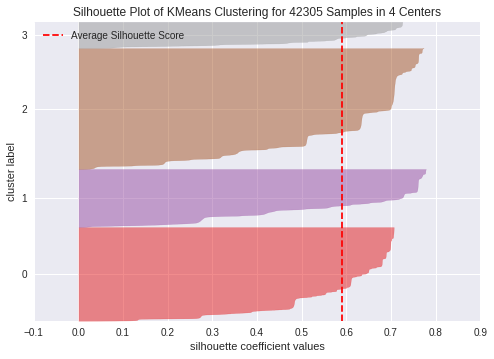

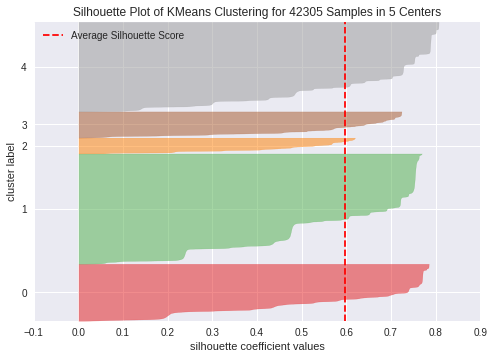

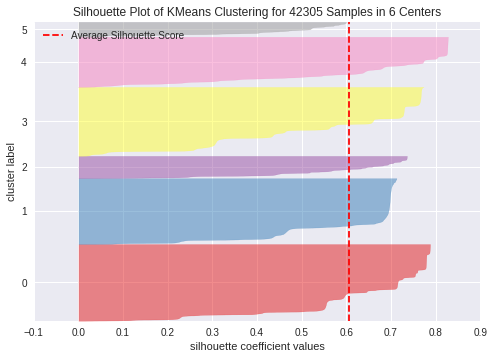

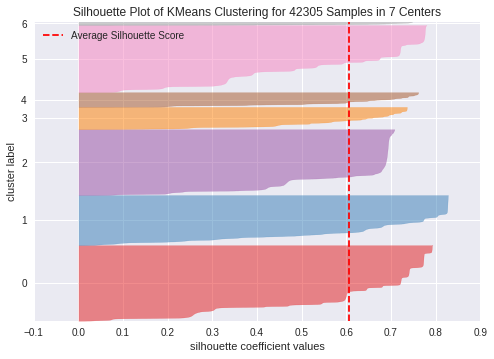

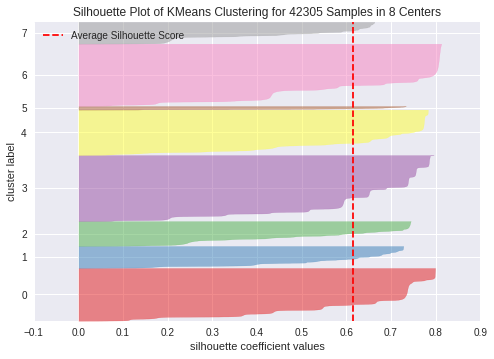

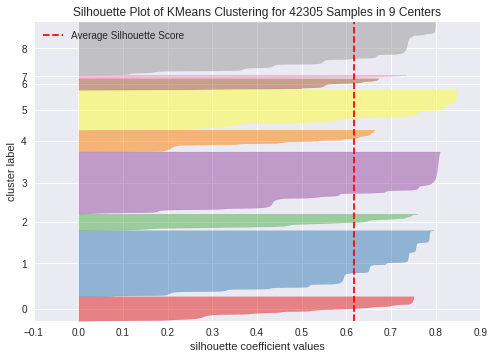

In [ ]:
for i in range(2, 10):
  model_4clust = KMeans(n_clusters = i, random_state=42)
  
  sil_visualizer = SilhouetteVisualizer(model_4clust)
  sil_visualizer.fit(df_te)    
  sil_visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_te)

predicted = pd.DataFrame(kmeans.predict(df_te), columns=["cluster"])
predictions = pd.concat([df_te, predicted ], axis=1)

predictions

tempo  energy  cluster
0      156.985   0.814        2
1      115.080   0.493        0
2      218.050   0.893        3
3      186.948   0.781        3
4      147.988   0.624        2
...        ...     ...      ...
42300  150.013   0.693        2
42301  149.928   0.768        2
42302  154.935   0.821        2
42303  150.042   0.921        2
42304  155.047   0.945        2

[42305 rows x 3 columns]

In [ ]:
df_te

tempo  energy
0      156.985   0.814
1      115.080   0.493
2      218.050   0.893
3      186.948   0.781
4      147.988   0.624
...        ...     ...
42300  150.013   0.693
42301  149.928   0.768
42302  154.935   0.821
42303  150.042   0.921
42304  155.047   0.945

[42305 rows x 2 columns]

In [ ]:
df_te = df_te.iloc[:,:].values

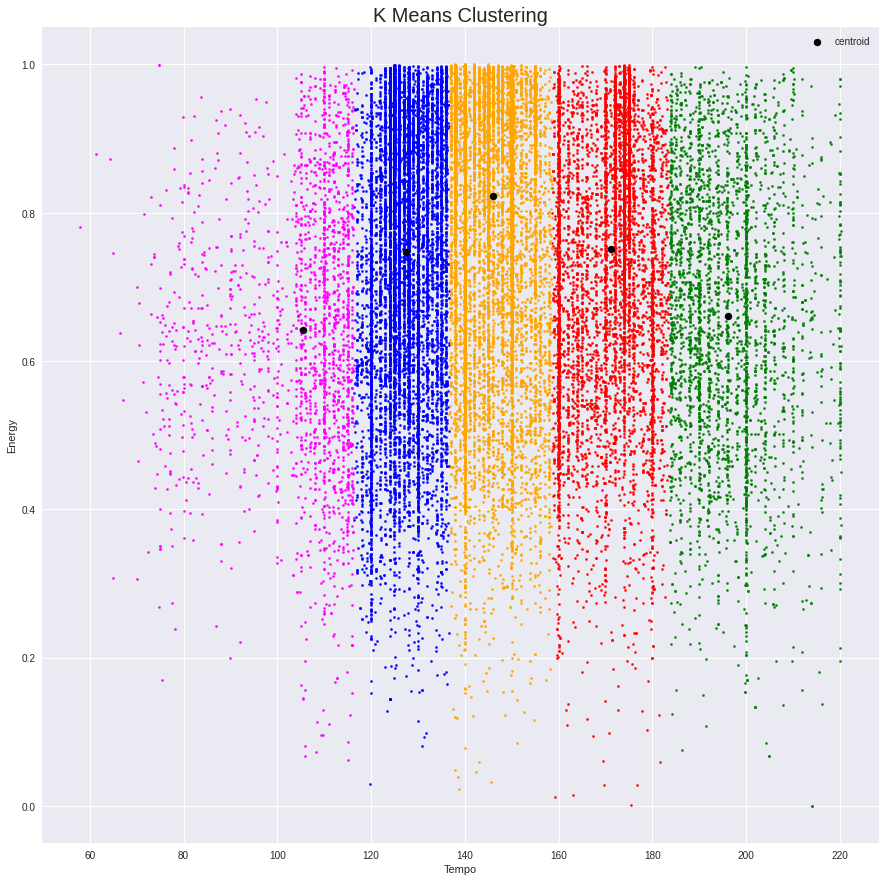

In [ ]:
# modello con 5 cluster
kmeans = KMeans(n_clusters = 5)

# alleno il modello
y_means = kmeans.fit_predict(df_te)

# plot dei vari cluster
plt.figure(figsize=(15,15))

# qui sto vedendo quelli che guadagnano poco e spendono molto
plt.scatter(df_te[y_means == 0, 0], df_te[y_means == 0, 1], s = 5, c = 'red')
plt.scatter(df_te[y_means == 1, 0], df_te[y_means == 1, 1], s = 5, c = 'blue')
plt.scatter(df_te[y_means == 2, 0], df_te[y_means == 2, 1], s = 5, c = 'green')
plt.scatter(df_te[y_means == 3, 0], df_te[y_means == 3, 1], s = 5, c = 'magenta')
plt.scatter(df_te[y_means == 4, 0], df_te[y_means == 4, 1], s = 5, c = 'orange')
# centroidi
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.legend()
plt.show()

### DBSCAN